In [1]:
import hashlib
import sys

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append("../../../")
from config.label_matchers import matchers

### Load the data:

In [2]:
train_df = pd.read_csv("./github-labels-top3-803k-train.tar.gz", index_col=0)
test_df = pd.read_csv("./github-labels-top3-803k-test.tar.gz", index_col=0)

In [3]:
print("Number of instances in the train dataset:", train_df.shape[0])
print("Number of instances in the test dataset:", test_df.shape[0])

Number of instances in the train dataset: 722899
Number of instances in the test dataset: 80518


In [4]:
train_df.sample(5)

,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body
675295,https://api.github.com/repos/concourse/concour...,bug,2021-05-28T08:43:06Z,NONE,https://api.github.com/repos/concourse/concourse,Worker 7.3.0 error on amazon linux (guardian.f...,## Summary\r\nconcourse worker stopped working...
392785,https://api.github.com/repos/sarawrmas/run-bud...,enhancement,2021-03-22T20:49:43Z,OWNER,https://api.github.com/repos/sarawrmas/run-buddy,CSS enhancements and optimizations,NaN
408156,https://api.github.com/repos/usc-isi-i2/t2wml/...,enhancement,2020-09-08T19:29:41Z,CONTRIBUTOR,https://api.github.com/repos/usc-isi-i2/t2wml,Make entity definitions project-specific,right now entity definitions are shared across...
2261,https://api.github.com/repos/Team-Gigabyte/quo...,bug,2020-12-31T18:50:34Z,CONTRIBUTOR,https://api.github.com/repos/Team-Gigabyte/quo...,LoL bugs,- [x] Sometimes the bot doesn't stop typing fo...
719968,https://api.github.com/repos/iterative/dvc.org...,bug,2020-09-05T08:13:23Z,CONTRIBUTOR,https://api.github.com/repos/iterative/dvc.org,docs: wrong use of `diff` highlighting + inden...,UPDATE: Jump to https://github.com/iterative/d...


In [5]:
test_df.sample(5)

,issue_url,issue_label,issue_created_at,issue_author_association,repository_url,issue_title,issue_body
230459,https://api.github.com/repos/ANSTO/refdb/issues/7,enhancement,2020-01-12T23:08:03Z,CONTRIBUTOR,https://api.github.com/repos/ANSTO/refdb,Link to original document,Add a link to the original document via the do...
496347,https://api.github.com/repos/indowa/git_practi...,enhancement,2021-04-01T03:54:44Z,OWNER,https://api.github.com/repos/indowa/git_practice,詳細画面を作る,NaN
361020,https://api.github.com/repos/3b1b/manim/issues...,bug,2021-02-12T02:07:03Z,COLLABORATOR,https://api.github.com/repos/3b1b/manim,Incorrect window position,### Describe the bug\r\n<!-- A clear and conci...
707832,https://api.github.com/repos/tiki/app/issues/6,enhancement,2021-03-31T02:12:44Z,CONTRIBUTOR,https://api.github.com/repos/tiki/app,Add a resend email button to the go-to inbox page,Add a button to resend the email if the user d...
432254,https://api.github.com/repos/home-assistant/an...,bug,2021-05-28T22:35:31Z,NONE,https://api.github.com/repos/home-assistant/an...,Lights groups can't be dimmed up or down in An...,<!-- READ THIS FIRST:\r\n- Make sure you run t...


In [6]:
train_df.columns = [c.replace("issue_", "") for c in train_df.columns]
test_df.columns = [c.replace("issue_", "") for c in test_df.columns]

In [7]:
def url_to_unique_number(url: str, length: int = 16) -> int:
    # Create a SHA-256 hash object
    hash_object = hashlib.sha256()
    
    # Encode the URL to bytes and update the hash object
    hash_object.update(url.encode('utf-8'))
    
    # Get the hexadecimal digest of the hash
    hex_digest = hash_object.hexdigest()
    
    # Take the first 'length' characters of the hexadecimal digest
    truncated_hex_digest = hex_digest[:length]
    
    # Convert the truncated hexadecimal digest to an integer
    unique_number = int(truncated_hex_digest, 16)
    
    return unique_number

train_df["id"] = train_df["url"].apply(url_to_unique_number)
test_df["id"] = test_df["url"].apply(url_to_unique_number)

In [8]:
matcher = {v: k for (k, v) in matchers["issue_type"].items()}
train_df["label"] = train_df["label"].replace(matcher).astype(int)
test_df["label"] = test_df["label"].replace(matcher).astype(int)

C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_10884\438979821.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df["label"] = train_df["label"].replace(matcher).astype(int)
C:\Users\Fabian Pena\AppData\Local\Temp\ipykernel_10884\438979821.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df["label"] = test_df["label"].replace(matcher).astype(int)


### Clean the data:

In [9]:
print("Number of missing titles in the train dataset:", train_df["title"].isnull().sum())
print("Number of missing titles in the test dataset:", test_df["title"].isnull().sum())

print("Number of missing bodies in the train dataset:", train_df["body"].isnull().sum())
print("Number of missing bodies in the test dataset:", test_df["body"].isnull().sum())

Number of missing titles in the train dataset: 0
Number of missing titles in the test dataset: 0
Number of missing bodies in the train dataset: 71872
Number of missing bodies in the test dataset: 7916


In [10]:
train_df.loc[train_df["body"].isnull(), "body"] = ""
test_df.loc[test_df["body"].isnull(), "body"] = ""

In [11]:
print("Number of missing labels in the train dataset:", train_df["label"].isnull().sum())
print("Number of missing labels in the test dataset:", test_df["label"].isnull().sum())

Number of missing labels in the train dataset: 0
Number of missing labels in the test dataset: 0


In [12]:
print(f"Number of duplicated titles and bodies in the train dataset: {train_df[["title", "body"]].duplicated().sum()} ({train_df[["title", "body"]].duplicated().sum()/train_df.shape[0]:.2%})")
print(f"Number of duplicated titles and bodies in the test dataset: {test_df[["title", "body"]].duplicated().sum()} ({test_df[["title", "body"]].duplicated().sum()/test_df.shape[0]:.2%})")

Number of duplicated titles and bodies in the train dataset: 38507 (5.33%)
Number of duplicated titles and bodies in the test dataset: 1204 (1.50%)


### Analyze distributions:

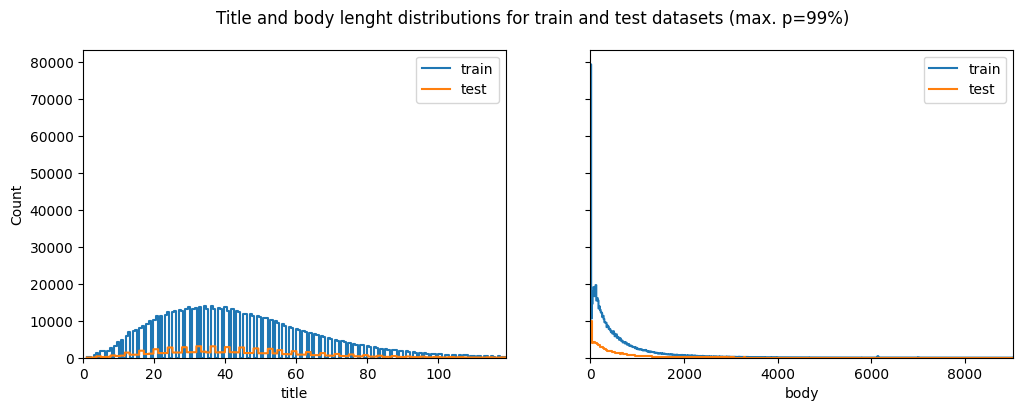

In [13]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 4))
sns.histplot(train_df["title"].str.len(), element="step", fill=False, ax=axes[0])
sns.histplot(test_df["title"].str.len(), element="step", fill=False, ax=axes[0])
axes[0].set_xlim([
    0,
    pd.concat([
        train_df["title"].str.len(),
        test_df["title"].str.len()
    ], axis=1, ignore_index=True).quantile(.99).max()
])
axes[0].legend(labels=["train", "test"])
sns.histplot(train_df["body"].str.len(), element="step", fill=False, ax=axes[1])
sns.histplot(test_df["body"].str.len(), element="step", fill=False, ax=axes[1])
axes[1].set_xlim([
    0,
    pd.concat([
        train_df["body"].str.len(),
        test_df["body"].str.len()
    ], axis=1, ignore_index=True).quantile(.99).max()
])
axes[1].legend(labels=["train", "test"])
plt.suptitle("Title and body lenght distributions for train and test datasets (max. p=99%)")
plt.show()

In [14]:
label_stats = pd.concat([
    train_df["label"].value_counts(dropna=False, normalize=True),
    test_df["label"].value_counts(dropna=False, normalize=True),
    pd.concat([train_df["label"], test_df["label"]]).value_counts(dropna=False, normalize=True)
], axis=1)
label_stats.columns = ["train", "test", "all"]
label_stats.round(2)

,train,test,all
label,,,
0,0.50,0.50,0.50
1,0.41,0.41,0.41
2,0.09,0.09,0.09


### Persist datasets:

In [15]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [16]:
def concat(x):
    text = ""
    if x["title"] != "":
        text = x["title"]
    if x["body"] != "":
        if text != "":
            text += ".\n"
        text += x["body"]
    return text

df["text"] = df.apply(concat, axis=1)

In [17]:
print(f"Number of duplicated texts in the entire dataset: {df["text"].duplicated().sum()} ({df["text"].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated texts in the entire dataset: 45725 (5.69%)


In [18]:
df[["id", "text", "label"]].to_parquet("./issue_type.parquet", index=False)

In [19]:
print("Number of instances in the persisted dataset:", df.shape[0])

Number of instances in the persisted dataset: 803417
